# 50 Hertz & CRISP-DM Methodology

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Import Data

In [3]:
# Import "50Hertz.csv":
# Obtain current work directory:
# os.getcwd()
df_original = pd.read_csv("/Users/joyceliao/Documents/Programming/ML/50Hertz.csv")
df_original.head(3)

,Date,00:00:00,00:15:00,00:30:00,00:45:00,01:00:00,01:15:00,01:30:00,01:45:00,02:00:00,...,21:30:00,21:45:00,22:00:00,22:15:00,22:30:00,22:45:00,23:00:00,23:15:00,23:30:00,23:45:00
0,23/08/2019,74,73,63,55,54,53,51,52,45,...,68,68,63,61,57,52,51,49,45,40
1,24/08/2019,37,38,35,35,31,32,30,29,28,...,118,118,112,107,104,104,99,95,95,96
2,25/08/2019,93,88,85,81,76,80,81,76,73,...,111,108,103,96,93,88,86,82,80,77


In [4]:
df_original.tail(3)

,Date,00:00:00,00:15:00,00:30:00,00:45:00,01:00:00,01:15:00,01:30:00,01:45:00,02:00:00,...,21:30:00,21:45:00,22:00:00,22:15:00,22:30:00,22:45:00,23:00:00,23:15:00,23:30:00,23:45:00
394,20/09/2020,111,102,95,87,82,83,80,75,72,...,109,105,104,95,89,81,73,69,66,57
395,21/09/2020,57,53,47,44,43,42,42,45,45,...,82,78,76,75,72,68,65,62,59,55
396,22/09/2020,51,48,44,42,40,39,38,35,35,...,75,72,71,72,76,75,72,71,69,66


#### Create Dataframe "df_monthly"

In [5]:
# Create "df_monthly":
column_names = ["Time"]
df_monthly = pd.DataFrame(columns = column_names)
df_monthly

,Time


#### Populate Column "Time":

In [6]:
time_value = np.arange(0, 1450, 15, dtype='float')
# len(time_value) = 97
time_value

array([   0.,   15.,   30.,   45.,   60.,   75.,   90.,  105.,  120.,
        135.,  150.,  165.,  180.,  195.,  210.,  225.,  240.,  255.,
        270.,  285.,  300.,  315.,  330.,  345.,  360.,  375.,  390.,
        405.,  420.,  435.,  450.,  465.,  480.,  495.,  510.,  525.,
        540.,  555.,  570.,  585.,  600.,  615.,  630.,  645.,  660.,
        675.,  690.,  705.,  720.,  735.,  750.,  765.,  780.,  795.,
        810.,  825.,  840.,  855.,  870.,  885.,  900.,  915.,  930.,
        945.,  960.,  975.,  990., 1005., 1020., 1035., 1050., 1065.,
       1080., 1095., 1110., 1125., 1140., 1155., 1170., 1185., 1200.,
       1215., 1230., 1245., 1260., 1275., 1290., 1305., 1320., 1335.,
       1350., 1365., 1380., 1395., 1410., 1425., 1440.])

In [7]:
df_monthly["Time"] = time_value
df_monthly

,Time
0,0.0
1,15.0
2,30.0
3,45.0
4,60.0
...,...
92,1380.0
93,1395.0
94,1410.0
95,1425.0


#### Populate 2019-09 Data

In [8]:
# Create 2019-Sep data with total row:
df_2019_09 = df_original.loc[9:38]
# df_2019_09.loc["2019-09"] = df_2019_09.sum()
array_2019_09 = np.array(df_2019_09.sum())
array_2019_09[0] = 0
array_2019_09

array([0, 3407, 3361, 3335, 3287, 3275, 3263, 3223, 3209, 3170, 3139,
       3080, 3056, 3042, 3054, 3098, 3078, 3114, 3186, 3165, 3143, 3150,
       3152, 3196, 3220, 3165, 3159, 3135, 3002, 2931, 2892, 2955, 2949,
       3053, 3222, 3449, 3566, 3824, 3921, 4039, 4157, 4288, 4421, 4484,
       4637, 4575, 4636, 4692, 4681, 4701, 4652, 4755, 4735, 4770, 4734,
       4729, 4700, 4754, 4661, 4529, 4536, 4440, 4404, 4225, 4163, 4036,
       3930, 3818, 3624, 3532, 3459, 3452, 3483, 3360, 3529, 3506, 3613,
       3624, 3642, 3684, 3704, 3691, 3730, 3691, 3658, 3658, 3642, 3663,
       3675, 3620, 3590, 3532, 3483, 3482, 3440, 3432, 3425], dtype=object)

In [9]:
df_monthly["2019-09"] = array_2019_09
df_monthly

,Time,2019-09
0,0.0,0
1,15.0,3407
2,30.0,3361
3,45.0,3335
4,60.0,3287
...,...,...
92,1380.0,3483
93,1395.0,3482
94,1410.0,3440
95,1425.0,3432


#### Drop Extra Row

In [10]:
df_monthly.drop(0, axis=0, inplace=True)
df_monthly

,Time,2019-09
1,15.0,3407
2,30.0,3361
3,45.0,3335
4,60.0,3287
5,75.0,3275
...,...,...
92,1380.0,3483
93,1395.0,3482
94,1410.0,3440
95,1425.0,3432


#### Change '2019-09' dtype to float64

In [11]:
df_monthly['2019-09'].dtype
df_monthly['2019-09'] = df_monthly['2019-09'].astype('float64')
df_monthly

,Time,2019-09
1,15.0,3407.0
2,30.0,3361.0
3,45.0,3335.0
4,60.0,3287.0
5,75.0,3275.0
...,...,...
92,1380.0,3483.0
93,1395.0,3482.0
94,1410.0,3440.0
95,1425.0,3432.0


### Check for Non-numeric Rows

In [12]:
# df_monthly['2019-09'].isna()
find_null = pd.to_numeric(df_monthly['2019-09'], errors='coerce').isnull()
df_monthly['2019-09'][pd.to_numeric(df_monthly['2019-09'], errors='coerce').isnull()]

Series([], Name: 2019-09, dtype: float64)

In [13]:
# Fill missing value with mean:
df_monthly['2019-09'].fillna(df_monthly['2019-09'].mean())

1     3407.0
2     3361.0
3     3335.0
4     3287.0
5     3275.0
       ...  
92    3483.0
93    3482.0
94    3440.0
95    3432.0
96    3425.0
Name: 2019-09, Length: 96, dtype: float64

#### Describe

In [14]:
df_monthly.describe()

,Time,2019-09
count,96.000000,96.000000
mean,727.500000,3699.291667
std,417.851648,577.715390
min,15.000000,2892.000000
25%,371.250000,3205.750000
50%,727.500000,3549.000000
75%,1083.750000,4158.500000
max,1440.000000,4770.000000


### Visual with Seaborn

<AxesSubplot:xlabel='Time', ylabel='2019-09'>

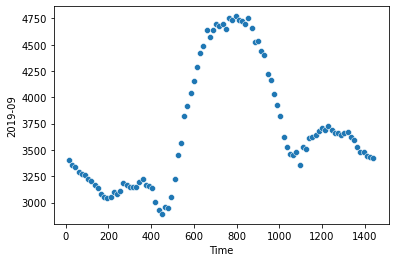

In [15]:
sns.scatterplot(data=df_monthly, x="Time", y="2019-09")

### Visual from Matplotlib

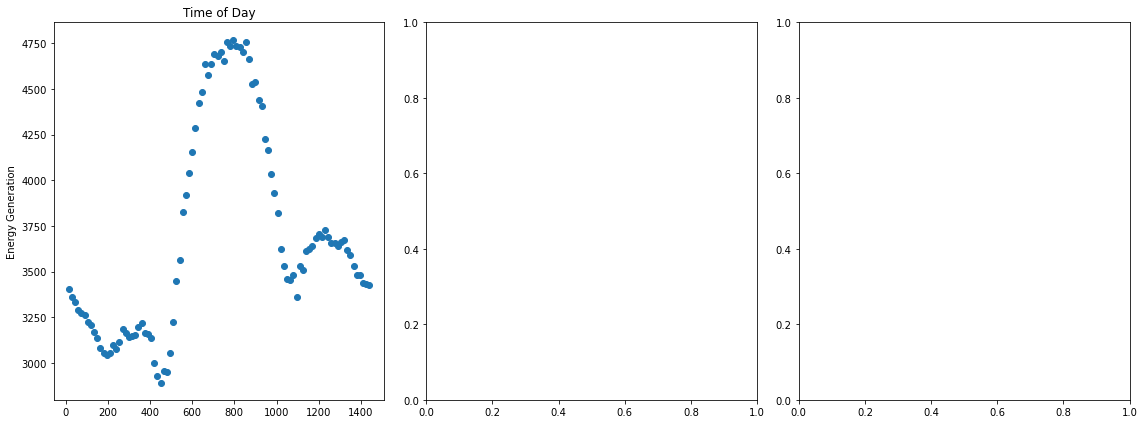

In [16]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df_monthly['Time'],df_monthly['2019-09'],'o')
axes[0].set_ylabel("Energy Generation")
axes[0].set_title("Time of Day")

plt.tight_layout();

### Seaborn Pairplot

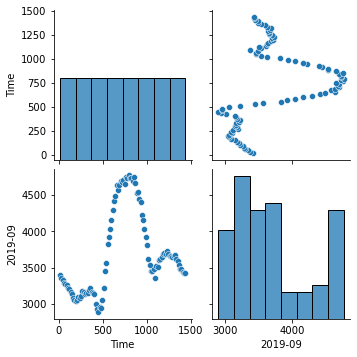

In [17]:
sns.pairplot(df_monthly)

### Numpy Polyfit

In [15]:
X = df_monthly['Time']
y = df_monthly['2019-09']

np.polyfit(X, y, deg=1)

array([4.70427745e-01, 3.35705548e+03])

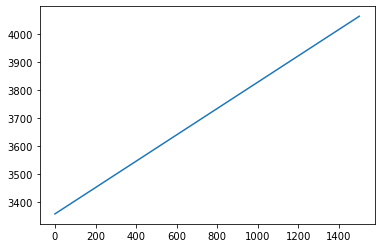

In [16]:
# Create a line graph of time and predicted_energy_generation
time = np.linspace(0, 1500, 500)
predicted_energy_generation = 0.470427745*time + 3357.05548
plt.plot(time, predicted_energy_generation)

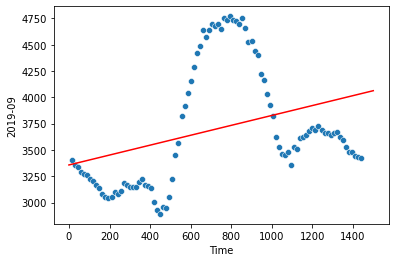

In [17]:
# To see the prediction line graph with actual data:
sns.scatterplot(data=df_monthly, x="Time", y="2019-09")
plt.plot(time, predicted_energy_generation, color='red')

In [18]:
# To predict the energy generation of an exact time of the day:
time = 1000
predictedS = 0.470427745*time + 3357.05548
predictedS

3827.483225

####  Seaborn "regplot()"

<AxesSubplot:xlabel='Time', ylabel='2019-09'>

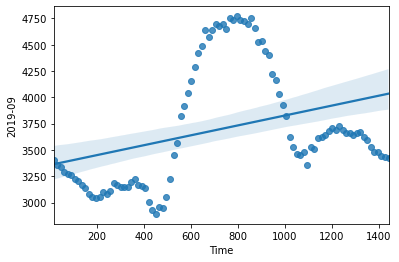

In [19]:
sns.regplot(data=df_monthly, x='Time', y='2019-09')

#### Numpy 3rd Polynomial Model:

In [20]:
# y = B3x**3 + B2x**2 + B1x + B0
# X = df_monthly['Time']
# y = df_monthly['2019-09']
np.polyfit(X, y, deg=3)

array([-2.68330075e-06,  3.75230919e-03,  1.05681507e-01,  3.03316792e+03])

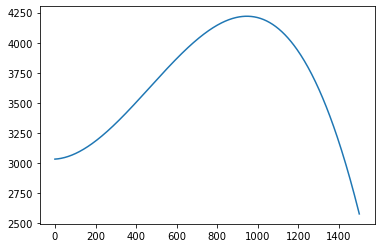

In [21]:
# Create a line graph of time and predicted_energy_generation
time_deg_3 = np.linspace(0, 1500, 500)
energy_generation_deg_3 = -2.68330075e-06 * time_deg_3 ** 3 + 3.75230919e-03 * time_deg_3 ** 2 + 1.05681507e-01 * time_deg_3 + 3.03316792e+03
plt.plot(time_deg_3, energy_generation_deg_3)

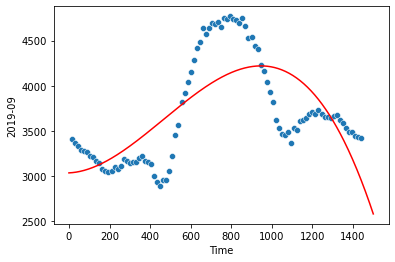

In [22]:
# To see the prediction line graph with actual data:
sns.scatterplot(data=df_monthly, x="Time", y="2019-09")
plt.plot(time_deg_3, energy_generation_deg_3, color='red')

#### Numpy 5th Polynomial Model:

In [23]:
# X = df_monthly['Time']
# y = df_monthly['2019-09']
np.polyfit(X, y, deg=5)

array([ 6.54254378e-12, -9.80220592e-09, -1.25513462e-05,  2.50093476e-02,
       -8.80370824e+00,  3.79837910e+03])

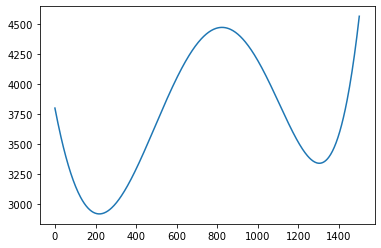

In [24]:
# Create a line graph of time and predicted_energy_generation
time_deg_5 = np.linspace(0, 1500, 500)
energy_generation_deg_5 = 6.54254378e-12 * time_deg_5 ** 5  + -9.80220592e-09 * time_deg_5 ** 4 + -1.25513462e-05 * time_deg_5 **3 + 2.50093476e-02 * time_deg_5**2 + -8.80370824e+00 * time_deg_5 + 3.79837910e+03
plt.plot(time_deg_5, energy_generation_deg_5)

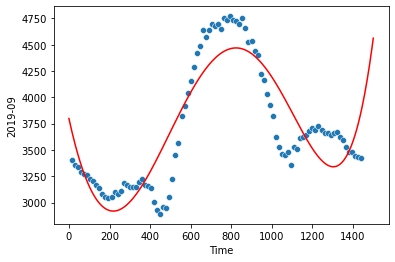

In [25]:
# To see the prediction line graph with actual data:
sns.scatterplot(data=df_monthly, x="Time", y="2019-09")
plt.plot(time_deg_5, energy_generation_deg_5, color='red')

#### Numpy 7th Polynomial Model:

In [26]:
# X = df_monthly['Time']
# y = df_monthly['2019-09']
np.polyfit(X, y, deg=7)

array([-7.26193700e-17,  2.90318846e-13, -3.92861856e-10,  1.73000510e-07,
        3.13853354e-05, -3.22837335e-02,  3.85828346e+00,  3.20929795e+03])

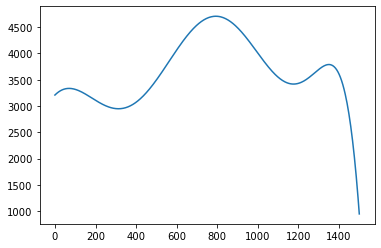

In [27]:
# Create a line graph of time and predicted_energy_generation
time_deg_7 = np.linspace(0, 1500, 500)
energy_generation_deg_7 = -7.26193700e-17 * time_deg_7 ** 7 + 2.90318846e-13 * time_deg_7 ** 6 + -3.92861856e-10 * time_deg_7 ** 5  + 1.73000510e-07 * time_deg_7 ** 4 + 3.13853354e-05 * time_deg_7 **3 + -3.22837335e-02 * time_deg_7**2 + 3.85828346e+00 * time_deg_7 + 3.20929795e+03
plt.plot(time_deg_7, energy_generation_deg_7)

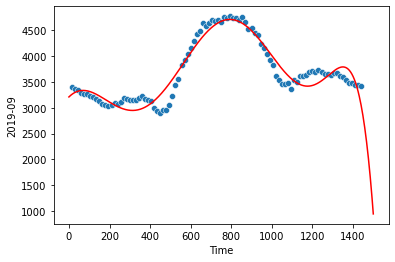

In [28]:
# To see the prediction line graph with actual data:
sns.scatterplot(data=df_monthly, x="Time", y="2019-09")
plt.plot(time_deg_7, energy_generation_deg_7, color='red')

#### Numpy 9th Polynomial Model:

In [29]:
# X = df_monthly['Time']
# y = df_monthly['2019-09']
np.polyfit(X, y, deg=9)

array([ 3.73627695e-22, -2.08296439e-18,  4.52233971e-15, -4.67677491e-12,
        2.09221193e-09, -2.27717119e-09, -3.11742391e-04,  9.71578826e-02,
       -1.13833534e+01,  3.63862642e+03])

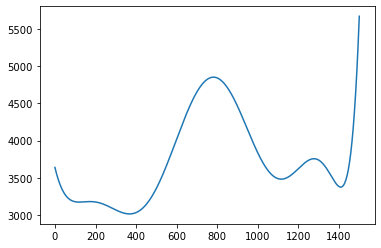

In [30]:
# Create a line graph of time and predicted_energy_generation
time_deg_9 = np.linspace(0, 1500, 500)
energy_generation_deg_9 = 3.73627695e-22 * time_deg_9 ** 9 - 2.08296439e-18 * time_deg_9 ** 8 + 4.52233971e-15 * time_deg_9 ** 7 - 4.67677491e-12 * time_deg_9 ** 6 + 2.09221193e-09 * time_deg_9 ** 5  - 2.27717119e-09 * time_deg_9 ** 4 - 3.11742391e-04 * time_deg_9 **3 + 9.71578826e-02 * time_deg_9**2 - 1.13833534e+01 * time_deg_9 + 3.63862642e+03
plt.plot(time_deg_9, energy_generation_deg_9)

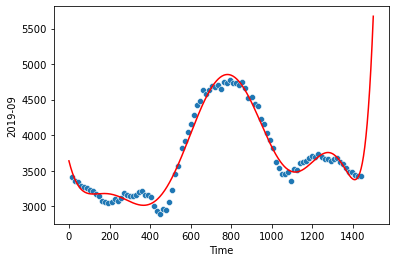

In [31]:
# To see the prediction line graph with actual data:
sns.scatterplot(data=df_monthly, x="Time", y="2019-09")
plt.plot(time_deg_9, energy_generation_deg_9, color='red')

### SkLearn

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [19]:
# Define X & y:
X = df_monthly.drop('2019-09', axis=1)
y = df_monthly['2019-09']
y.head(3)

1    3407.0
2    3361.0
3    3335.0
Name: 2019-09, dtype: float64

In [20]:
# Split data into 70% of training data and 30% of test data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#### Polynomial Regression (Degree=3)

In [21]:
# Create LinearRegression model with a degree of 3:
degree=3
model_3 = make_pipeline(PolynomialFeatures(3), LinearRegression())
model_3.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

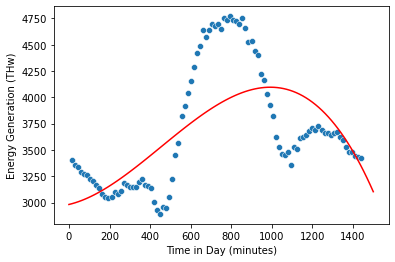

In [22]:
# Create a line graph of time and predicted_energy_generation
time = np.linspace(0, 1500, 96)
predicted_3 = model_3.predict(X)

# To see the prediction line graph with actual data:
sns.scatterplot(data=df_monthly, x="Time", y="2019-09")
plt.xlabel("Time in Day (minutes)")
plt.ylabel("Energy Generation (THw)")
plt.plot(time, predicted_3, color='red')

#### 3rd Polynomial Evaluation:

In [23]:
predicted_3_test = model_3.predict(X_test)
mean_absolute_error(y_test, predicted_3_test)

374.88727302031475

In [24]:
mean_squared_error(y_test, predicted_3_test)

204301.3797239608

#### Polynomial Regression (Degree=5)

In [25]:
# Create LinearRegression model with a degree of 5:
degree=5
model_5 = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model_5.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('linearregression', LinearRegression())])

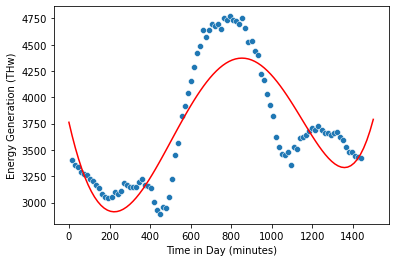

In [26]:
# Create a line graph of time and predicted_energy_generation
time = np.linspace(0, 1500, 96)
predicted_5 = model_5.predict(X)

# To see the prediction line graph with actual data:
sns.scatterplot(data=df_monthly, x="Time", y="2019-09")
plt.xlabel("Time in Day (minutes)")
plt.ylabel("Energy Generation (THw)")
plt.plot(time, predicted_5, color='red')

#### 5th Polynomial Evaluation:

In [27]:
predicted_5_test = model_5.predict(X_test)
mean_absolute_error(y_test, predicted_5_test)

251.0409781817995

In [28]:
mean_squared_error(y_test, predicted_5_test)

80876.58946597026

#### Polynomial Regression (Degree=7)

In [29]:
# Create LinearRegression model with a degree of 7:
degree=7
model_7 = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model_7.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=7)),
                ('linearregression', LinearRegression())])

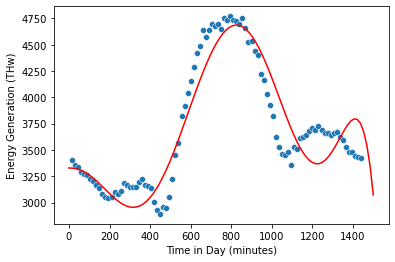

In [30]:
# Create a line graph of time and predicted_energy_generation
time = np.linspace(0, 1500, 96)
predicted_7 = model_7.predict(X)

# To see the prediction line graph with actual data:
sns.scatterplot(data=df_monthly, x="Time", y="2019-09")
plt.xlabel("Time in Day (minutes)")
plt.ylabel("Energy Generation (THw)")
plt.plot(time, predicted_7, color='red')

#### 7th Polynomial Evaluation:

In [31]:
predicted_7_test = model_7.predict(X_test)
mean_absolute_error(y_test, predicted_7_test)

131.7037396127451

In [32]:
mean_squared_error(y_test, predicted_7_test)

28442.986175339796

#### Polynomial Regression (Degree=9)

In [35]:
# Create LinearRegression model with a degree of 9:
degree=9
model_9 = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model_9.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=9)),
                ('linearregression', LinearRegression())])

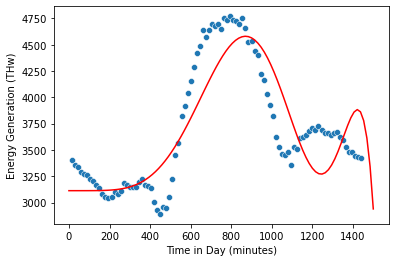

In [36]:
# Create a line graph of time and predicted_energy_generation
time = np.linspace(0, 1500, 96)
predicted_9 = model_9.predict(X)

# To see the prediction line graph with actual data:
sns.scatterplot(data=df_monthly, x="Time", y="2019-09")
plt.xlabel("Time in Day (minutes)")
plt.ylabel("Energy Generation (THw)")
plt.plot(time, predicted_9, color='red')

#### 9th Polynomial Evaluation:

In [37]:
predicted_9_test = model_9.predict(X_test)
mean_absolute_error(y_test, predicted_9_test)

212.21737671840222

In [38]:
mean_squared_error(y_test, predicted_9_test)

68571.69824043255